In [35]:
# Exploration 1 - Checking the first cells 
import pandas as pd

# code for loading the dataset
df = pd.read_csv('/Users/tanjucoskun/s2025-ds-1/data/global_electricity_production_data.csv')

# Step 2: Drop missing 'value' rows
df_clean = df.dropna(subset=['value']).copy()

# Step 3: Convert 'date' column to datetime
df_clean['date'] = pd.to_datetime(df_clean['date'], errors='coerce')

# Step 4: Drop rows where date conversion failed
df_clean = df_clean[df_clean['date'].notnull()]

# Step 5: Extract 'year' as integer
df_clean['year'] = df_clean['date'].dt.year.astype(int)

df_clean = df_clean.copy()
df_clean['date'] = pd.to_datetime(df_clean['date'], errors='coerce')

# Check if conversion worked
print(df_clean['date'].dtype)  # Should be datetime64[ns]

# Step 6: Confirm
df_clean[['date', 'year']].head()


datetime64[ns]


,date,year
0,2023-12-01,2023
1,2023-12-01,2023
2,2023-12-01,2023
3,2023-12-01,2023
4,2023-12-01,2023


In [36]:

# to display the rows to have a preview of the data df.head() code is only giving the first 5 rows by deafult!
df.head()

,country_name,date,parameter,product,value,unit
0,Australia,12/1/2023,Net Electricity Production,Electricity,22646.1901,GWh
1,Australia,12/1/2023,Net Electricity Production,Total Combustible Fuels,13397.9356,GWh
2,Australia,12/1/2023,Net Electricity Production,"Coal, Peat and Manufactured Gases",9768.5223,GWh
3,Australia,12/1/2023,Net Electricity Production,Oil and Petroleum Products,289.5415,GWh
4,Australia,12/1/2023,Net Electricity Production,Natural Gas,3091.9272,GWh


In [37]:
# Exploration 2 - the amount of Rows and Columns ( structure of the chart)

print("Rows, Columns:", df.shape)


Rows, Columns: (121074, 6)


In [38]:
# Exploration 3 - name of the columns since there are 6 columns its better to list their names

print("\nColumns:")
print(df.columns)


Columns:
Index(['country_name', 'date', 'parameter', 'product', 'value', 'unit'], dtype='object')


In [39]:
# Exploration 4 - data types and missing values if any

print("\nInfo:")
print(df.info())


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121074 entries, 0 to 121073
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   country_name  121074 non-null  object 
 1   date          121074 non-null  object 
 2   parameter     121074 non-null  object 
 3   product       121074 non-null  object 
 4   value         121060 non-null  float64
 5   unit          121074 non-null  object 
dtypes: float64(1), object(5)
memory usage: 5.5+ MB
None


In [40]:
# Exploration 5 - amount of missing values

print("\nMissing values per column:")
print(df.isnull().sum())



Missing values per column:
country_name     0
date             0
parameter        0
product          0
value           14
unit             0
dtype: int64


In [41]:
# Cleaning the Data - removing the missing rows in "Value"

df_clean = df.dropna(subset=['value'])

# Cross-check if the data clean now
df_clean.isnull().sum()

country_name    0
date            0
parameter       0
product         0
value           0
unit            0
dtype: int64

In [42]:
# Converting 'date column' (dtype: 'object' to 'datetime64'

df_clean.loc[:, 'date'] = pd.to_datetime(df_clean['date'], errors='coerce')

# test if there are any mising dates after
df_clean['date'].isnull().sum()


0

In [43]:
df_clean = df_clean.copy()
df_clean['date'] = pd.to_datetime(df_clean['date'], errors='coerce')

# Check if conversion worked
print(df_clean['date'].dtype)  # Should be datetime64[ns]

datetime64[ns]


In [44]:
# Here I had df_clean error 'year' column was not recognized and I had to re write this lines on top of the first line again.

df_clean.loc[:, 'date'] = pd.to_datetime(df_clean['date'], errors='coerce')
df_clean = df_clean[df_clean['date'].notnull()]
df_clean['year'] = df_clean['date'].dt.year.astype(int)

In [45]:
# Issue fixed - 'year' column is now visible
df_clean.columns

Index(['country_name', 'date', 'parameter', 'product', 'value', 'unit',
       'year'],
      dtype='object')

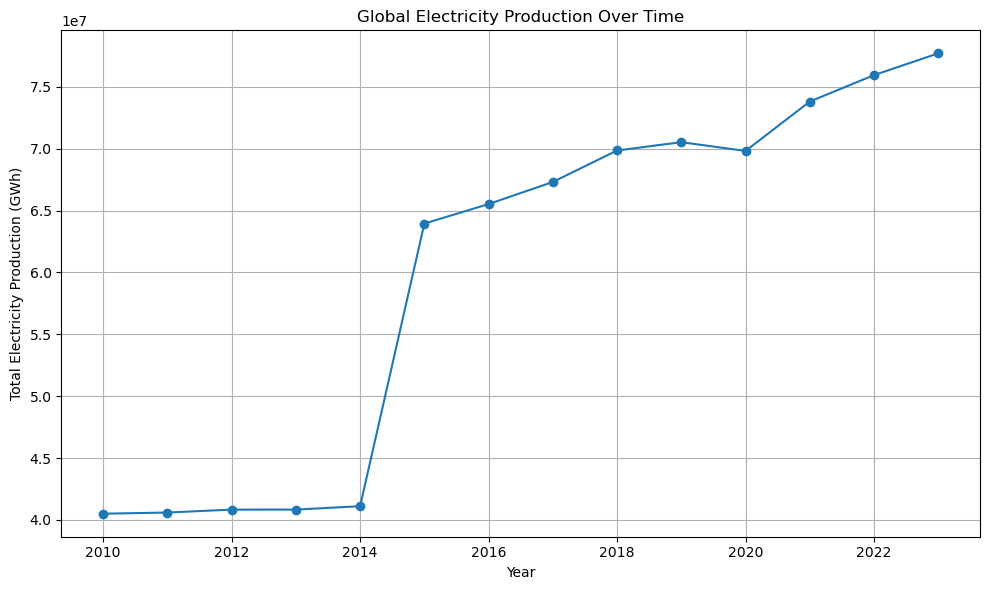

In [46]:
import matplotlib.pyplot as plt

# Group by year and sum the 'value' column
yearly_production = df_clean.groupby('year')['value'].sum().reset_index()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(yearly_production['year'], yearly_production['value'], marker='o')

plt.title('Global Electricity Production Over Time')
plt.xlabel('Year')
plt.ylabel('Total Electricity Production (GWh)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [47]:
# code - yearly production per year
yearly_production = df_clean.groupby('year')['value'].sum().reset_index()

# result
yearly_production.head()

,year,value
0,2010,4.049677e+07
1,2011,4.059139e+07
2,2012,4.082690e+07
3,2013,4.083009e+07
4,2014,4.110371e+07


In [48]:

# check-balance categories 1 > categories
df_clean['parameter'].unique()

array(['Net Electricity Production', 'Used for pumped storage',
       'Distribution Losses', 'Final Consumption (Calculated)',
       'Total Imports', 'Total Exports'], dtype=object)

In [49]:
# check-balance categories 2 > total values
df_clean.groupby('parameter')['value'].sum().sort_values(ascending=True)


parameter
Used for pumped storage           1.233267e+06
Total Exports                     6.699914e+06
Total Imports                     6.818840e+06
Distribution Losses               9.105886e+06
Final Consumption (Calculated)    1.375341e+08
Net Electricity Production        6.769583e+08
Name: value, dtype: float64

In [50]:
# what I wanted to check apart form the assignment
# countries with highest total energy production (Lowest 5)

top_countries = df_clean.groupby('country_name')['value'].sum().sort_values(ascending=True).head(5)
top_countries

country_name
Malta               48680.8822
Cyprus             129982.7781
Costa Rica         146269.5777
North Macedonia    146513.0323
Luxembourg         351860.0673
Name: value, dtype: float64

In [51]:
# countries with highest total energy production (Top 5)

top_countries = df_clean.groupby('country_name')['value'].sum().sort_values(ascending=False).head(5)
top_countries


country_name
United States    2.240113e+08
China            1.921116e+08
Japan            5.691577e+07
India            4.041455e+07
Canada           3.434354e+07
Name: value, dtype: float64

In [54]:
# for the next question saving the names of the top 5 countries
top_country_list = top_countries.index.tolist()

In [75]:

# filtering the date for the 'top 5' only
top_country_data = df_clean[df_clean['country_name'].isin(top_country_list)]

print(top_country_list)


# extracting avg monthly per top 5 countries 
avg_monthly = top_country_data.groupby('country_name')['value'].mean()
avg_monthly


['United States', 'China', 'Japan', 'India', 'Canada']


country_name
Canada            10718.957741
China            120370.698323
India             26107.593299
Japan             19118.498751
United States     69139.288868
Name: value, dtype: float64

In [56]:
# dominant energy sources
top_products = df_clean.groupby('product')['value'].sum().sort_values(ascending=False).head(3)
top_products


product
Electricity                          3.952399e+08
Total Combustible Fuels              1.441409e+08
Coal, Peat and Manufactured Gases    9.035597e+07
Name: value, dtype: float64

In [57]:
# product names saved as another list
top_product_list = top_products.index.tolist()


In [98]:
# dominant energy sources - share changes year on year  
# filter - top 3 products
top_product_data = df_clean[df_clean['product'].isin(top_product_list)]

# table sorted by 'year' and contains 'year', 'product' and 'value' ( here 'value's are per year)
product_share = top_product_data.groupby(['year', 'product'])['value'].sum().reset_index()

# creating total_value column per top 3 products (here we are adding 'sum value for all years')
total_by_year = df_clean.groupby('year')['value'].sum().reset_index().rename(columns={'value': 'total_value'})

# merging the new 'total_value' column to the 'product_share' table
merged = product_share.merge(total_by_year, on='year')

# merging '%' column to show the percentage share of the values
merged['%'] = (merged['value'] / merged['total_value']) * 100

# check
merged.head(5)

,year,product,value,total_value,%
0,2010,"Coal, Peat and Manufactured Gases",3.484643e+06,4.049677e+07,8.604743
1,2010,Electricity,2.165300e+07,4.049677e+07,53.468455
2,2010,Total Combustible Fuels,6.454244e+06,4.049677e+07,15.937676
3,2011,"Coal, Peat and Manufactured Gases",3.394687e+06,4.059139e+07,8.363073
4,2011,Electricity,2.165675e+07,4.059139e+07,53.353066
